###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
import os
from google.colab import drive

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
os.chdir('drive/My Drive/Assessment')

In [5]:
data1= pd.read_csv('college_1.csv')

In [6]:
data2=pd.read_csv('college_2.csv')

In [7]:
data1.head(5)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0


In [8]:
data2.head()

,Name,python,python_en,mysql,computational_thinking,Previous Geekions,CodeKata Score,Department,Rising
0,ASHOK KUMAR K,100,0,31,9,19400,19400,Electronics and Electrical Engineering,0
1,Chandru,0,20,0,0,14150,14490,Computer Science and Engineering,340
2,Ganesh Ramkumar R,-1,55,24,6,8790,10790,Computer Science and Engineering,2000
3,Bodipudi Harini,-1,0,35,-1,10040,10040,Electronics and Communication Engineering,0
4,VIINU V P,-1,100,24,-1,9150,9150,Electronics and Electrical Engineering,0


In [13]:
data1.columns

Index(['Name', 'python', 'mysql', 'Previous Geekions', 'CodeKata Score',
       'Department', 'Rising'],
      dtype='object')

In [14]:
data2.columns

Index(['Name', 'python', 'python_en', 'mysql', 'computational_thinking',
       'Previous Geekions', 'CodeKata Score', 'Department', 'Rising'],
      dtype='object')

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [27]:
df=pd.merge(data1,data2, how='outer', on=['Name','python','mysql','Previous Geekions','CodeKata Score','Department','Rising'],right_index=False)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1208: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN


In [26]:
df.shape

(119, 9)

###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [39]:
x=df.loc[df['CodeKata Score']>15000]
x

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
84,ASHOK KUMAR K,100.0,31.0,19400,19400,Electronics and Electrical Engineering,0,0.0,9.0


In [40]:
x.to_csv('Exceeded expectations.csv')

In [49]:
y=df.loc[(df['CodeKata Score']<15000)&(df['CodeKata Score']>10000)].sort_values('CodeKata Score', ascending=False).reset_index(drop=True)
y

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,Chandru,0.0,0.0,14150,14490,Computer Science and Engineering,340,20.0,0.0
1,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,55.0,6.0
2,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
3,Bodipudi Harini,-1.0,35.0,10040,10040,Electronics and Communication Engineering,0,0.0,-1.0


In [50]:
y.to_csv('Reached_expectations.csv')

In [51]:
z=df.loc[(df['CodeKata Score']<10000)&(df['CodeKata Score']>7000)].sort_values('CodeKata Score', ascending=False).reset_index(drop=True)
z

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,VIINU V P,-1.0,24.0,9150,9150,Electronics and Electrical Engineering,0,100.0,-1.0
1,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
2,Poojitha Y,0.0,35.0,7210,8970,Computer Science and Engineering,1760,78.0,0.0
3,Gowtham Chandrasekaran,-1.0,0.0,7250,8950,Computer Science and Engineering,1700,0.0,3.0
4,Gowtham R,-1.0,4.0,8650,8650,Electronics and Communication Engineering,0,60.0,6.0
5,shifak N,58.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0
6,NIVEESHWAR S,100.0,0.0,8200,8200,Computer Science and Engineering,0,NaN,NaN
7,Balaji,-1.0,20.0,6170,8160,Electronics and Electrical Engineering,1990,100.0,0.0
8,Rushitha,-1.0,62.0,7470,8090,Computer Science and Engineering,620,15.0,9.0
9,Balaraman Muthupandi,-1.0,0.0,7670,8050,Computer Science and Engineering,380,9.0,0.0


In [52]:
z.to_csv('Needs_Improvement.csv')

In [53]:
a=df.loc[df['CodeKata Score']<7000]
a

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
8,J.SUGANTHI,27.0,50.00,5860,5860,Electronics and Communication Engineering,0,NaN,NaN
9,thamizhpaana,29.0,0.00,5500,5500,Computer Science and Engineering,0,NaN,NaN
10,Iyappan Samiraj,50.0,24.00,5400,5400,Electronics and Communication Engineering,0,NaN,NaN
11,Ponniyamma.R,100.0,11.25,5380,5380,Computer Science and Engineering,0,NaN,NaN
12,SABAPATHI,100.0,0.00,5280,5280,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
114,praveen raj j,24.0,0.00,2380,2380,Computer Science and Engineering,0,-1.0,0.0
115,AMARNATH D,-1.0,12.00,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
116,bala,32.0,0.00,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
117,XY Z,-1.0,-1.00,0,0,Computer Science and Engineering,0,20.0,-1.0


In [54]:
a.to_csv('Unsatisfactory.csv')

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [64]:
np.mean(df['Previous Geekions'])

3842.3529411764707

In [65]:
np.mean(df['CodeKata Score'])

4051.764705882353

In [69]:
df['Previous Geekions'].mean()

3842.3529411764707

In [70]:
df['CodeKata Score'].mean()

4051.764705882353

###### No of students participated 

In [74]:
df["Name"].size

119

###### #Average completion of python course or my_sql or python english or computational thinking

In [96]:
x=df.loc[(df.python == 100)|(df.mysql == 100)|(df.mysql == 100)|(df.python_en == 100)|(df.computational_thinking == 100)]
x.shape[0]

46

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [98]:
x=df.sort_values('CodeKata Score',ascending=False).head(3)
x['Name']

0      A.Dharani
1    V.JEEVITHA 
2    HEMAVATHI.R
Name: Name, dtype: object

###### Shining stars of the week (top 3 candidates who has highest geekions)

In [95]:
x=df.sort_values('Previous Geekions',ascending=False).head(3)
x['Name']

0      A.Dharani
1    V.JEEVITHA 
2    HEMAVATHI.R
Name: Name, dtype: object

###### Department wise codekata performence (pie chart)

In [99]:
df.Department.unique()

array(['Computer Science and Engineering',
       'Electronics and Communication Engineering',
       'Electronics and Electrical Engineering'], dtype=object)

In [115]:
x=df.loc[df.Department=='Computer Science and Engineering']
x['CodeKata Score'].mean()

5079.761904761905

In [116]:
x=df.loc[df.Department=='Electronics and Communication Engineering']
x['CodeKata Score'].mean()

2777.8205128205127

In [117]:
x=df.loc[df.Department=='Electronics and Electrical Engineering']
x['CodeKata Score'].mean()

3164.705882352941

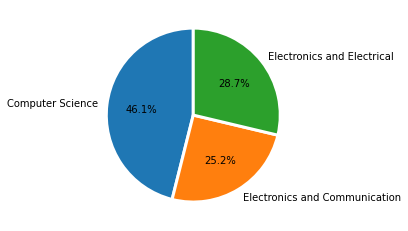

In [123]:

labels = 'Computer Science', 'Electronics and Communication', 'Electronics and Electrical'
sizes = [5079.761904761905, 2777.8205128205127, 3164.705882352941]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        wedgeprops={"linewidth": 3, "edgecolor": "white"})

plt.show()

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [131]:
x=df.loc[df.Department=='Computer Science and Engineering']
x.sort_values('CodeKata Score',ascending=False).head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


In [128]:
x=df.loc[df.Department=='Electronics and Communication Engineering']
x.sort_values('CodeKata Score',ascending=False).head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
87,Bodipudi Harini,-1.0,35.0,10040,10040,Electronics and Communication Engineering,0,0.0,-1.0
91,Gowtham R,-1.0,4.0,8650,8650,Electronics and Communication Engineering,0,60.0,6.0
6,KALAIARASAN K,85.0,47.0,7750,7880,Electronics and Communication Engineering,130,NaN,NaN


In [129]:
x=df.loc[df.Department=='Electronics and Electrical Engineering']
x.sort_values('CodeKata Score',ascending=False).head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
84,ASHOK KUMAR K,100.0,31.0,19400,19400,Electronics and Electrical Engineering,0,0.0,9.0
88,VIINU V P,-1.0,24.0,9150,9150,Electronics and Electrical Engineering,0,100.0,-1.0
92,shifak N,58.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0


In [178]:
labels = ['CS', 'E&tc', 'Electrical']
cs = [24500,10040,19400]
etc = [21740,8650,9150]
electrical=[19680,7880,8320]

In [173]:
x = np.arange(len(labels))
width=0.20

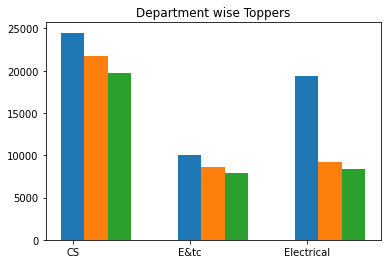

In [188]:
plt.bar(x, cs, width, label='Computer Science')
plt.bar(x+width, etc, width, label='Electronics and Communication')
plt.bar(x+width+width, electrical, width, label='Electronics and Electrical')
plt.xticks(x, labels)
plt.title('Department wise Toppers')
plt.show()